# Based on the Hurricane and Typhoon data (1851-2014) in Pacific ocean, we have to classify the storms into hurricanes and typhoons and their subcategories in a predefined class

In [1]:
#we will use decision tree, random forest, naive bayes and svm

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree

In [4]:
import os
os.chdir(r'C:\Users\je638474\Documents\JJ\Folders\Udemy\Python EDUREKA')

In [8]:
data = pd.read_csv('pacific.csv')
print (data.head(6))

         ID                 Name      Date  Time Event Status Latitude  \
0  EP011949              UNNAMED  19490611     0           TS    20.2N   
1  EP011949              UNNAMED  19490611   600           TS    20.2N   
2  EP011949              UNNAMED  19490611  1200           TS    20.2N   
3  EP011949              UNNAMED  19490611  1800           TS    20.3N   
4  EP011949              UNNAMED  19490612     0           TS    20.4N   
5  EP011949              UNNAMED  19490612   600           TS    20.5N   

  Longitude  Maximum Wind  Minimum Pressure  ...  Low Wind SW  Low Wind NW  \
0    106.3W            45              -999  ...         -999         -999   
1    106.4W            45              -999  ...         -999         -999   
2    106.7W            45              -999  ...         -999         -999   
3    107.7W            45              -999  ...         -999         -999   
4    108.6W            45              -999  ...         -999         -999   
5    109.4W  

In [11]:
data.Status = pd.Categorical(data.Status)
data['Status'] = data.Status.cat.codes

In [13]:
data
print (data.head(6))

         ID                 Name      Date  Time Event  Status Latitude  \
0  EP011949              UNNAMED  19490611     0            11    20.2N   
1  EP011949              UNNAMED  19490611   600            11    20.2N   
2  EP011949              UNNAMED  19490611  1200            11    20.2N   
3  EP011949              UNNAMED  19490611  1800            11    20.3N   
4  EP011949              UNNAMED  19490612     0            11    20.4N   
5  EP011949              UNNAMED  19490612   600            11    20.5N   

  Longitude  Maximum Wind  Minimum Pressure  ...  Low Wind SW  Low Wind NW  \
0    106.3W            45              -999  ...         -999         -999   
1    106.4W            45              -999  ...         -999         -999   
2    106.7W            45              -999  ...         -999         -999   
3    107.7W            45              -999  ...         -999         -999   
4    108.6W            45              -999  ...         -999         -999   
5    1

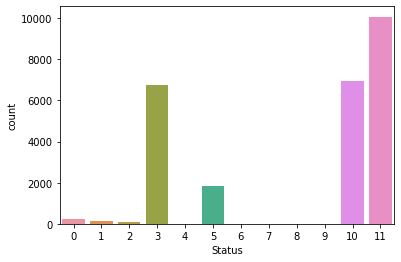

In [14]:
sns.countplot(data['Status'], label = 'Count')
plt.show()

In [17]:
pred_columns = data[:]
pred_columns.drop(['Status'],axis=1,inplace=True)
pred_columns.drop(['Event'],axis=1,inplace=True)
pred_columns.drop(['Latitude'],axis=1,inplace=True)
pred_columns.drop(['Longitude'],axis=1,inplace=True)
pred_columns.drop(['ID'],axis=1,inplace=True)
pred_columns.drop(['Name'],axis=1,inplace=True)
pred_columns.drop(['Date'],axis=1,inplace=True)
pred_columns.drop(['Time'],axis=1,inplace=True)
prediction_var = pred_columns.columns
print(list(prediction_var))

['Maximum Wind', 'Minimum Pressure', 'Low Wind NE', 'Low Wind SE', 'Low Wind SW', 'Low Wind NW', 'Moderate Wind NE', 'Moderate Wind SE', 'Moderate Wind SW', 'Moderate Wind NW', 'High Wind NE', 'High Wind SE', 'High Wind SW', 'High Wind NW']


C:\Users\je638474\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [18]:
train, test = train_test_split(data, test_size = 0.3)# in this our main data is splitted into train and test
# we can check their dimension
print(train.shape)
print(test.shape)

(18295, 22)
(7842, 22)


In [19]:
train_X = train[prediction_var]# taking the training data input
train_y= train['Status']# This is output of our training data
#print(list(data.columns))
print(list(train.columns))

['ID', 'Name', 'Date', 'Time', 'Event', 'Status', 'Latitude', 'Longitude', 'Maximum Wind', 'Minimum Pressure', 'Low Wind NE', 'Low Wind SE', 'Low Wind SW', 'Low Wind NW', 'Moderate Wind NE', 'Moderate Wind SE', 'Moderate Wind SW', 'Moderate Wind NW', 'High Wind NE', 'High Wind SE', 'High Wind SW', 'High Wind NW']


In [20]:
# same we have to do for test
test_X= test[prediction_var] # taking test data inputs
test_y =test['Status']   #output value of test dat

In [22]:
#RandomForest classifier
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100)# a simple random forest model
model.fit(train_X,train_y)# now fit our model for traiing data
prediction=model.predict(test_X)# predict for the test data
#prediction will contain the predicted value by our model predicted values of diagnosis column for test inputs
print(metrics.accuracy_score(prediction,test_y)) # to check the accuracy
# here we will use accuracy measurement between our predicted value and our test output values

0.9586840091813313


In [23]:
#Decision Tree
model = tree.DecisionTreeClassifier()
model.fit(train_X,train_y)# now fit our model for traiing data

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [24]:
prediction=model.predict(test_X)# predict for the test data
# prediction will contain the predicted value by our model predicted values of diagnosis column for test inputs

In [25]:
df=pd.DataFrame(prediction,test_y)
print(df)

         0
Status    
3        3
11      11
11      11
3        3
5        5
...     ..
11      11
11      11
5        5
11      11
5        5

[7842 rows x 1 columns]


In [26]:
print(metrics.accuracy_score(prediction,test_y)) # to check the accuracy
# here we will use accuracy measurement between our predicted value and our test output values

0.958301453710788
